In [ ]:
import numpy as np
import pandas as pd
from scipy import stats

from plotnine import *

# Together

## Distributions

A distribution is a curve (although sometimes it's pretty straight) that shows how common or uncommon different values are. For example, this is a normal distribution with mean = 0 and standard deviation = 1. Which values are relatively common under this distribution? Uncommon?

<img src="https://drive.google.com/uc?export=view&id=1G0l7s0oheMJRt0I0j9qm_rNbRpogVobo" width = 600px />


What about this one?
<img src="https://drive.google.com/uc?export=view&id=1FZ0YZCHBIZZ-4RYo7pUssuSz-fwGc2Jn" width = 600px />


## Function Optimization

In our lecture we talked about derivatives, and that we often want to *minimize* functions when doing Data Scienc e + Machine Learning. While I won't dive into ALL the calculus now (if this kind of thing excites you, you should take CPSC 393!) I want to talk about some of the ideas behind minimizing functions.

<img src="https://drive.google.com/uc?export=view&id=1GP0gQm1spsSU5qZWZJseENIz6q7XUfvK" width = 600px />
or

<img src="https://drive.google.com/uc?export=view&id=1UT7GKUDqjNU1yHcQHK2bLmgHsxWBUNJv" width = 600px />

or

<img src="https://drive.google.com/uc?export=view&id=1Fn8W3IMhYZDk-Ut7VtWgA_gyQw3uSJCq" width = 600px />

# In Your Groups

## Logarithms

Use your new pandas skills to add a column, `logX` to the dataframe DF that contains the log ([`np.log()`](https://numpy.org/doc/stable/reference/generated/numpy.log.html)) of the column `X`.

Then run the pre-written code (no need to change anything) to plot the log function.

What range of values can the log() function take in? What range of values can the log function spit out? What happens to values < 1 when you log() them? What about values > 1?

<img src="https://drive.google.com/uc?export=view&id=1ghyQPx1N8dmU3MV4TrANvqNhGwnLni72" width = 200px />

In [ ]:
DF = pd.DataFrame({"X": np.linspace(0.0001,10, 10000)})

### YOUR CODE HERE ###

DF["logX"] = np.log(DF)

### /YOUR CODE HERE ###

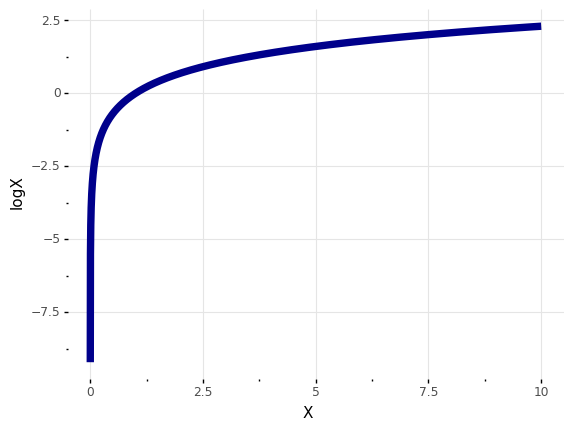

<ggplot: (8764057544293)>

In [ ]:
# DONT CHANGE, JUST RUN

(ggplot(DF, aes(x = "X", y = "logX")) +
 geom_line(color = "darkblue", size = 3) +
 theme_bw() +
theme(panel_border = element_blank(),
     panel_grid_minor = element_blank()))

## Data Types

In your lecture, you learned about different types of data/variables we could have. Go to our course github and click on the *Data* folder. Get the raw URL for the **Beyonce_data.csv** dataset and load it in using `pd.read_csv()`. Store your dataframe in the variable `bey`, and print the head of the dataframe.
<img src="https://drive.google.com/uc?export=view&id=1ghyQPx1N8dmU3MV4TrANvqNhGwnLni72" width = 200px />

In [ ]:
bey_url = "https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/Beyonce_data.csv"
bey = pd.read_csv(bey_url)
bey.head()

Unnamed: 0 artist_name  ...  duration_ms                    track_name
0           1     Beyoncé  ...        43850    balance (mufasa interlude)
1           2     Beyoncé  ...       226479                        BIGGER
2           3     Beyoncé  ...        46566  the stars (mufasa interlude)
3           4     Beyoncé  ...       162353            FIND YOUR WAY BACK
4           5     Beyoncé  ...        13853   uncle scar (scar interlude)

[5 rows x 14 columns]

What types are all the variables?

- Categorical:
    - nominal: artist_name
    - ordinal:
    - interval: key
- Numeric: danceability, energy, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence
- Boolean: mode
- Text: track_name

If a variable is Categorical, how do you decide if it's nominal, ordinal, or interval? Give an example of each.
<img src="https://drive.google.com/uc?export=view&id=1ghyQPx1N8dmU3MV4TrANvqNhGwnLni72" width = 200px />

## Probabilities and Conditional Probabilities

Remember that in general, probabilities are

$\frac{\text{# of events of interest}}{\text{total # of events}}$

Given this information, and the dataframe `voters`, calculate the probability of:

- being a registered voter
- being a vegetarian AND a registered voter

<img src="https://drive.google.com/uc?export=view&id=1ghyQPx1N8dmU3MV4TrANvqNhGwnLni72" width = 200px />

In [ ]:
registered = ['no', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'no',
       'yes', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no', 'yes']

diet = ['Meat_Eater', 'Vegetarian', 'Vegetarian', 'Vegan', 'Vegetarian',
       'Vegetarian', 'Vegetarian', 'Vegetarian', 'Meat_Eater', 'Vegan',
       'Vegan', 'Vegetarian', 'Meat_Eater', 'Meat_Eater', 'Vegan',
       'Vegan', 'Vegetarian', 'Meat_Eater', 'Meat_Eater', 'Vegetarian']

voters = pd.DataFrame({"RegisteredToVote": registered, "Diet": diet})

voters_veg = voters['Diet'] == 'Vegetarian'

voters_reg = voters["RegisteredToVote"] == "yes"

total = len(registered)

probability = len(voters[voters_reg]) / total
probability2 = len(voters[voters_reg][voters_veg]) / len(voters["RegisteredToVote"])

 # print(voters_reg)

voters[voters_veg]

print(probability)
print(probability2)


0.45
0.3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


**Conditional probabilities** are just probabilities where the total events are *restricted* by some kind of information.

For example: $P(\textbf{Vegetarian | registered to vote})$ (in words we'd say this as "the Probability of being Vegetarian *given* that you are registered to vote") means that we want to know the probability of being Vegetarian when ONLY looking at registered voters. This means that the denominator of our probability will only count registered voters.

There are 9 registered voters in our data frame, and out of those 9, 6 are Vegetarian. So $P(\textbf{Vegetarian | registered to vote})$  = $\frac{6}{9}$.

Using the data frame `booksRead` below which indicates the responses from 25 people about which books they had read in the past 5 years, calculate (using code or by hand) the following probabilites:
- P(read Tale of Two Cities)
- P(read the Bible)
- P(read What to Expect When You're Expecting **|** read Tale of Two Cities)
- P(read What to Expect When You're Expecting **|** read Tale of Two Cities **AND** the Bible)
- P(read How to Win Friends and Influence People **|** did not read LOTR)
- P(read LOTR **AND** Tale of Two Cities)

<img src="https://drive.google.com/uc?export=view&id=1ghyQPx1N8dmU3MV4TrANvqNhGwnLni72" width = 200px />

In [ ]:
taleOfTwoCities = ['yes', 'yes', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'yes', 'no',
       'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes']

bible = ['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes']

howToWinFriendsAndInfluencePeople = ['yes', 'no', 'no', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no',
       'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'yes']

whatToExpectWhenYoureExpecting = ['yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'yes',
       'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'yes', 'no', 'yes']

LOTR = ['yes', 'yes', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no',
       'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no', 'no', 'no',
       'yes', 'yes', 'no', 'yes', 'no']

booksRead = pd.DataFrame({"taleOfTwoCities": taleOfTwoCities,
                         "bible": bible,
                         "howToWinFriendsAndInfluencePeople": howToWinFriendsAndInfluencePeople,
                         "whatToExpectWhenYoureExpecting": whatToExpectWhenYoureExpecting,
                         "LOTR": LOTR})

read_TOTC = booksRead["taleOfTwoCities"] == "yes"
read_bible = booksRead["bible"] =="yes"
read_HTWFAIP = booksRead["howToWinFriendsAndInfluencePeople"] == "yes"
read_WTEWYE = booksRead["whatToExpectWhenYoureExpecting"] == "yes"
read_LOTR = booksRead["LOTR"] == "yes"

total = len(booksRead)
print("The total number of people in this dataset is:", total)

# P(read Tale of Two Cities)
prob_TOTC = len(booksRead[read_TOTC]) / total
print("The probability of reading Tale of Two Cities is: ", prob_TOTC)

# P(read the Bible)
prob_bible = len(booksRead[read_bible]) / total
print("The probability of reading the Bible is: ", prob_bible)

# P(read What to Expect When You're Expecting | read Tale of Two Cities)
prob_WTEWYE = len(booksRead[read_WTEWYE]) / total
prob_WTEWYE_and_TOTC = prob_WTEWYE * prob_TOTC
prob_WTEWYE_TOTC_f = prob_WTEWYE_and_TOTC / prob_WTEWYE
print("The probability of reading What to Expect When You're Expecting given reading Tale of Two Cities is: ", prob_WTEWYE_TOTC_f)

# P(read What to Expect When You're Expecting | read Tale of Two Cities AND the Bible)
prob_TOTC_and_bible = prob_TOTC * (len(booksRead[read_bible]) / total)
A = prob_TOTC_and_bible * prob_WTEWYE
B = round(A / prob_WTEWYE, 2)
print("The probability of reading What to Expect When You're Expecting given reading the Bible and TOTC is: ", B)

# P(read How to Win Friends and Influence People | did not read LOTR)
prob_LOTR = len(booksRead[read_LOTR]) / total
prob_didntread_LOTR = 1 - prob_LOTR
prob_HTWFAIP = len(booksRead[read_HTWFAIP]) / total
prob_HTWFAIP_and_didntread_LOTR = prob_HTWFAIP * prob_didntread_LOTR
prob_HTWFAIP_given_didntread_LOTR = round(prob_HTWFAIP_and_didntread_LOTR / prob_HTWFAIP, 2)
print("The probability of reading HTWFAIP given not reading LOTR is: ", prob_HTWFAIP_given_didntread_LOTR)

# P(read LOTR AND Tale of Two Cities)
prob_LOTR_and_TOTC = round(prob_LOTR * prob_TOTC, 2)
print("The probability of reading LOTR and Tale of Two Cities is: ", prob_LOTR_and_TOTC)


The total number of people in this dataset is: 25
The probability of reading Tale of Two Cities is:  0.84
The probability of reading the Bible is:  0.96
The probability of reading What to Expect When You're Expecting given reading Tale of Two Cities is:  0.84
The probability of reading What to Expect When You're Expecting given reading the Bible and TOTC is:  0.81
The probability of reading HTWFAIP given not reading LOTR is:  0.68
The probability of reading LOTR and Tale of Two Cities is:  0.27


## Odds

Odds are the probability of something happening, divided by the probabilit of it not happening. What are the **Odds** of the following events:

- The odds of Bob scoring a goal during a soccer game if P(Bob scoring a goal during a soccer game) = 0.2
- The odds of flipping a heads on a fair coin if P(head) = 0.5
- The odds of your professor showing up in a Dinosaur costume today if P(professor showing up in a Dinosaur costume) = 0.7
- The odds of NOT winning the lottery if P(winning the lottery) = 0.0000001

<img src="https://drive.google.com/uc?export=view&id=1ghyQPx1N8dmU3MV4TrANvqNhGwnLni72" width = 200px />

If my odds of ordering pizza tonight are 3, what is the probability that I order pizza? If I increase my odds by 10x and my odds are now 30, what is the probability that I order pizza?

<img src="https://drive.google.com/uc?export=view&id=1ghyQPx1N8dmU3MV4TrANvqNhGwnLni72" width = 200px />